# **K-Means**

## Penjelasan K-Means Clustering

K-Means Clustering merupakan metode pengelompokan data (clustering) yang bertujuan membagi data ke dalam beberapa kelompok (cluster) berdasarkan kemiripan karakteristik. Teknik ini bekerja dengan cara mengelompokkan data yang memiliki fitur serupa ke dalam satu cluster, sedangkan data yang memiliki perbedaan signifikan akan dimasukkan ke cluster yang berbeda. Pusat dari setiap cluster dikenal sebagai centroid, dan menjadi acuan dalam proses pengelompokan.



## Manfaat Clustering

- Clustering sangat bermanfaat dalam segmentasi data, khususnya dalam analisis dan prediksi berbagai permasalahan bisnis. Contoh penerapannya termasuk dalam segmentasi pelanggan, strategi pemasaran, serta perencanaan zonasi wilayah.

- Berguna dalam pengenalan objek pada berbagai bidang seperti computer vision dan image processing.

Clustering yang efektif akan menghasilkan kelompok dengan tingkat kemiripan internal yang tinggi dan perbedaan yang besar antar kelompok. Kemiripan diukur secara numerik, dan semakin tinggi nilainya, semakin mirip dua objek yang dibandingkan. Kualitas clustering sangat tergantung pada metode yang digunakan.


## Inertia (Sum Square Error/SSE)
Dalam algoritma K-Means Clustering, inertia atau Sum of Squared Errors (SSE) digunakan sebagai indikator untuk mengukur seberapa baik data telah dikelompokkan. Metrik ini menghitung total jumlah kuadrat jarak antara tiap data dengan centroid dari cluster tempat data tersebut berada.

Rumusnya adalah:

$$
\text{Inertia} = \sum_{i=1}^{n} \left\| x_i - \mu_{c_i} \right\|^2
$$

**Penjelasan Notasi**
$x_i$: Data ke-$i$

$\mu_{c_i}$: Centroid dari cluster tempat $x_i$ termasuk

$\left| x_i - \mu_{c_i} \right|^2$: Jarak kuadrat Euclidean antara titik data $x_i$ dan centroid-nya

$n$: Jumlah total data

## Silhouette Analysis
Silhouette Analysis adalah metode evaluasi lain yang sering dianggap lebih informatif dibandingkan inertia karena mempertimbangkan dua aspek utama sekaligus:

- Kekompakan data dalam cluster yang sama

- Jarak antar cluster yang berbeda

Silhouette score menilai seberapa baik sebuah titik data cocok dengan cluster-nya sendiri dibandingkan dengan cluster lain yang paling dekat.

Rumusnya sebagai berikut:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$


Keterangan Notasi:

$a(i)$: Rata-rata jarak antara titik $i$ dan semua titik dalam cluster yang sama (koherensi)

$b(i)$: Rata-rata jarak antara titik $i$ dan seluruh titik dalam cluster terdekat yang berbeda (pemisahan)

$s(i)$: Nilai silhouette untuk titik $i$, berada di rentang -1 hingga 1

nterpretasi nilai $s(i)$:

Jika $s(i)$ mendekati 1, maka titik tersebut sangat sesuai dengan cluster-nya dan jauh dari cluster lain

Jika $s(i)$ mendekati 0, maka titik tersebut berada di batas antara dua cluster

Jika $s(i)$ mendekati -1, maka besar kemungkinan titik tersebut salah masuk cluster

Untuk menilai performa clustering secara keseluruhan, digunakan rata-rata dari semua nilai $s(i)$:

$$
S = \frac{1}{n} \sum_{i=1}^{n} s(i)
$$

$n$: Total jumlah data

$S$: Rata-rata silhouette score seluruh data

## Implementasi menggunakan data Iris

In [ ]:
%pip install pymysql
%pip install psycopg2

In [ ]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

## mengambil dan menggabungkan Data dari Database

In [ ]:
def get_pg_data():
    # conn = psycopg2.connect(
    #     host="pg-10937f1d-hamdialfian1-e960.i.aivencloud.com",
    #     user="avnadmin",
    #     password="AVNS_HaAQgyz8pJY_jE09Ytk",
    #     database="defaultdb,
    #     port=10063
    # )
    conn = psycopg2.connect(
        host="pg-3fbafb7b-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_sc56Zt79uy033vzjIS4",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    # conn = pymysql.connect(
    #     host="mysql-158771e3-hamdialfian1-e960.h.aivencloud.com",
    #     user="avnadmin",
    #     password="AVNS_jKJZUy4bXi_rirC-EeT",
    #     database="defaultdb",
    #     port=10063
    # )
    conn = pymysql.connect(
        host="mysql-16cb25be-hrmen55-bd28.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_MfLHp-bDUZ-2mkcA1a6",
        database="defaultdb",
        port=23283
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          49.0          2.0          40.9         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa           1.5          0.2           4.6          3.1
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa          14.0         20.0           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa          19.0          2.0           4.8          3.4
 13     Iris-setosa           1.4     

## Data asli yang sebelum di normalisasi

 data sebelum di normalisasi

In [ ]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

print (features_before_scaling.to_string(index=False));

 petal_length  petal_width  sepal_length  sepal_width
          1.4          0.2           5.1          3.5
         49.0          2.0          40.9         30.0
          1.3          0.2           4.7          3.2
          1.5          0.2           4.6          3.1
          1.4          0.2           5.0          3.6
          1.7          0.4           5.4          3.9
          1.4          0.3           4.6          3.4
          1.5          0.2           5.0          3.4
          1.4          0.2           4.4          2.9
         14.0         20.0           4.9          3.1
          1.5          0.2           5.4          3.7
         19.0          2.0           4.8          3.4
          1.4          0.1           4.8          3.0
          1.0          0.0           4.3          3.0
          1.2          0.2           5.8          4.0
          5.0          4.0           5.7          4.4
          1.3          0.4           5.4          3.9
          4.0          3.0  

## Visualisasi data

## Visualisasi data asli tanpa menggunakan PCA
visualisasi data Iris secara 2 Dimensi tanpa menggunakan PCA

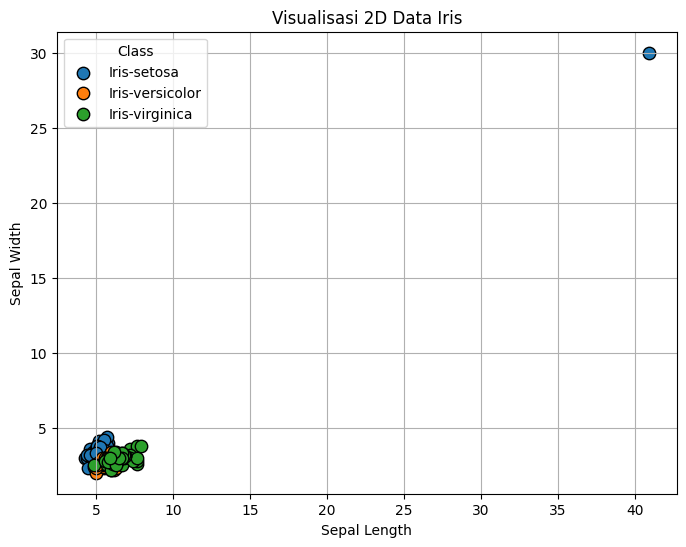

In [ ]:
# Ubah kolom 'class' menjadi kategori jika belum
df_merged['class'] = df_merged['class'].astype('category')

# Plot 2D scatter plot
plt.figure(figsize=(8, 6))
for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=label, s=80, edgecolors='k')

plt.title("Visualisasi 2D Data Iris")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title='Class')
plt.grid(True)
plt.show()


visualisasi data Iris secara 3 Dimensi tanpa menggunakan PCA

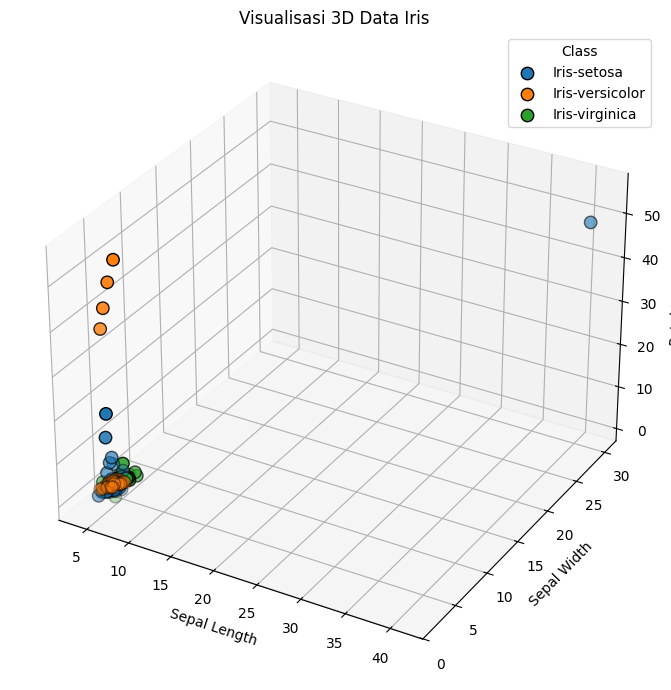

In [ ]:
df_merged['class'] = df_merged['class'].astype('category')

# Plot 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for label in df_merged['class'].cat.categories:
    subset = df_merged[df_merged['class'] == label]
    ax.scatter(
        subset['sepal_length'],
        subset['sepal_width'],
        subset['petal_length'],
        label=label,
        s=80,
        edgecolors='k'
    )

ax.set_title("Visualisasi 3D Data Iris")
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.legend(title='Class')
plt.tight_layout()
plt.show()

### Visualisasi data asli menggunakan PCA

visualisasi data Iris secara 2 Dimensi menggunakan PCA

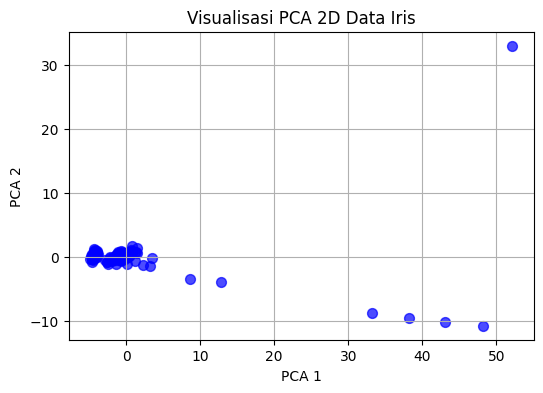

In [ ]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA langsung pada data mentah (belum dinormalisasi)
pca_raw = PCA(n_components=2)
reduced_raw = pca_raw.fit_transform(features_before_scaling)

# Visualisasi 2D hasil PCA sebelum normalisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_raw[:, 0], reduced_raw[:, 1], c='blue', s=50, alpha=0.7)
plt.title("Visualisasi PCA 2D Data Iris")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

visualisasi data Iris secara 3 Dimensi menggunakan PCA

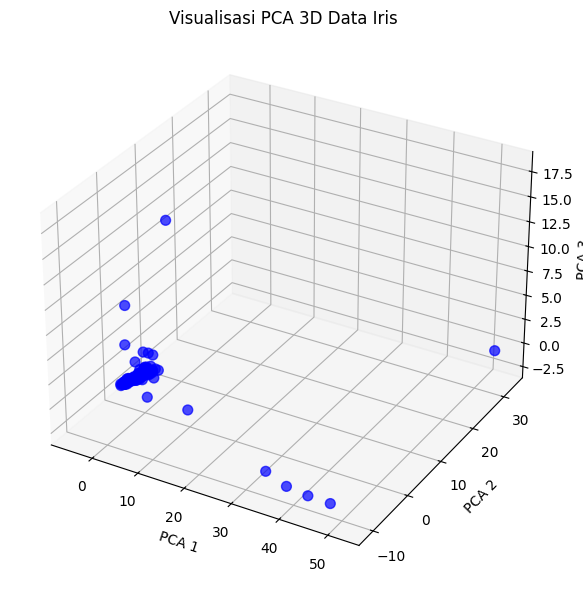

In [ ]:
# Ambil hanya fitur numerik (hapus kolom non-numerik)
features_before_scaling = df_merged.drop(columns=['id', 'class'])

# PCA ke 3 komponen tanpa normalisasi
pca_raw_3d = PCA(n_components=3)
reduced_raw_3d = pca_raw_3d.fit_transform(features_before_scaling)

# Visualisasi 3D hasil PCA sebelum normalisasi
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    reduced_raw_3d[:, 0],
    reduced_raw_3d[:, 1],
    reduced_raw_3d[:, 2],
    c='blue',
    s=50,
    alpha=0.7
)

ax.set_title("Visualisasi PCA 3D Data Iris")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.tight_layout()
plt.show()


## Preprocessing dan Reduksi Dimensi

## normalisasi Menggunakan MinMaxScaler
Pada tahap ini, saya melakukan normalisasi data menggunakan MinMaxScaler untuk menyetarakan skala antar fitur dalam dataset. Hal ini dilakukan karena setiap fitur memiliki rentang nilai yang berbeda, dan perbedaan ini dapat memengaruhi performa model, khususnya algoritma yang sensitif terhadap jarak seperti KNN maupun SVM.

MinMaxScaler bekerja dengan mentransformasikan setiap nilai fitur ke dalam skala antara 0 hingga 1, berdasarkan nilai minimum dan maksimum dari masing-masing fitur. Dengan begitu, seluruh fitur memiliki skala yang seimbang, sehingga algoritma tidak cenderung memprioritaskan fitur tertentu.

Setelah menerapkan normalisasi ini, saya melihat bahwa model menjadi lebih konsisten dan akurat dalam menghasilkan prediksi. Dari sini saya menyadari bahwa proses normalisasi bukan sekadar langkah teknis, tetapi merupakan bagian penting dalam memastikan kualitas data yang digunakan dalam pelatihan model machine learning.

In [ ]:
# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(scaled_features)


Berikut adalah data hasil standarisasi menggunakan MinMaxScaler

In [ ]:
# print (scaled_features);

## Clustering menggunakan K-Means

### Clustering dengan 2 cluster dan Visualisasi data

Pada tahap ini, saya menggunakan algoritma K-Means untuk melakukan pengelompokan data Iris menjadi dua cluster. Setelah proses clustering dilakukan, saya menghitung nilai Inertia dan Silhouette Score sebagai metrik evaluasi untuk menilai kualitas pembagian cluster yang dihasilkan. Sebagai tambahan, saya juga memvisualisasikan hasil clustering dalam ruang dua dimensi agar lebih mudah memahami pola pengelompokan yang terbentuk.



[2 Clusters] Inertia: 3.2103, Silhouette Score: 0.8844


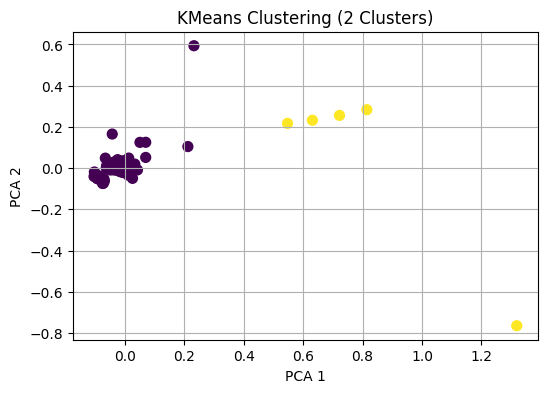

In [ ]:
# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[2 Clusters] Inertia: 3.2103, Silhouette Score: 0.8844


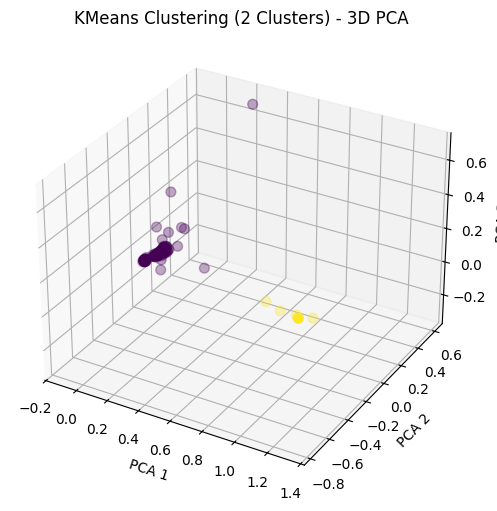

In [ ]:
# PCA dengan 3 komponen untuk visualisasi 3D
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.4f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_2, cmap='viridis', s=50
)

ax.set_title("KMeans Clustering (2 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 3 cluster dan Visualisasi data

Pada bagian ini, saya menerapkan algoritma K-Means untuk mengelompokkan data Iris ke dalam tiga cluster. Setelah proses pengelompokan selesai, saya menghitung nilai Inertia serta Silhouette Score untuk mengevaluasi kualitas hasil clustering. Selain itu, saya juga membuat visualisasi dalam dua dimensi untuk memperlihatkan bagaimana data terbagi setelah dilakukan clustering.



[3 Clusters] Inertia: 1.7170, Silhouette Score: 0.8752


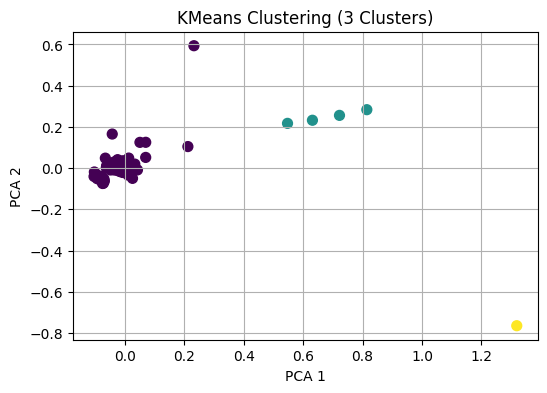

In [ ]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[3 Clusters] Inertia: 1.7170, Silhouette Score: 0.8752


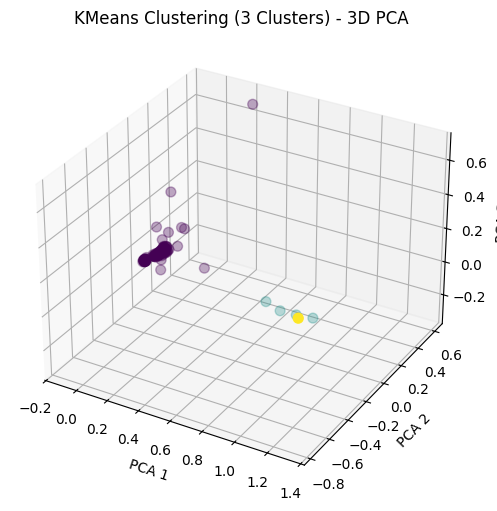

In [ ]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Evaluasi
inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.4f}, Silhouette Score: {silhouette_3:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_3,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (3 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()


### Clustering dengan 4 cluster dan Visualisasi data

Pada tahap ini, saya menerapkan metode K-Means untuk membagi data Iris ke dalam empat kelompok (cluster). Setelah proses clustering dijalankan, saya menghitung nilai Inertia dan Silhouette Score guna menilai seberapa baik pembagian cluster yang terbentuk. Kemudian, hasil pengelompokan divisualisasikan dalam dua dimensi untuk memberikan gambaran yang lebih jelas mengenai distribusi data setelah diklaster.

[4 Clusters] Inertia: 0.8242, Silhouette Score: 0.8802


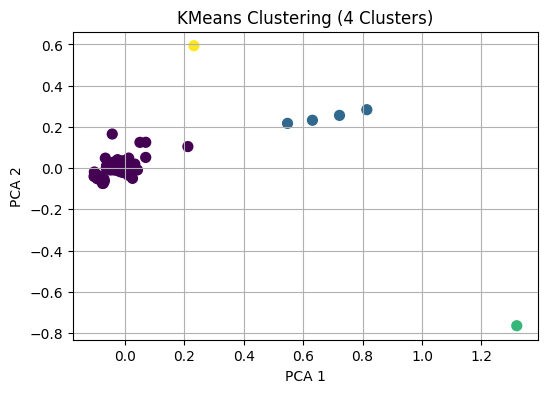

In [ ]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

Berikut juga saya lakukan visualisasi 3 Dimensi pada data Iris setelah clustering

[4 Clusters] Inertia: 0.8242, Silhouette Score: 0.8802


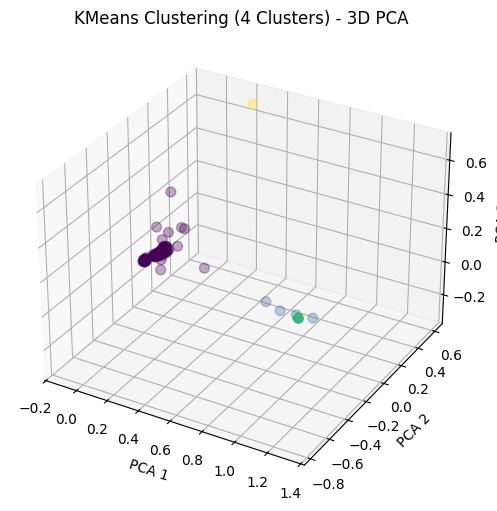

In [ ]:
# PCA dengan 3 komponen
pca_3d = PCA(n_components=3)
reduced_features_3d = pca_3d.fit_transform(scaled_features)

# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.4f}, Silhouette Score: {silhouette_4:.4f}")

# Visualisasi 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    reduced_features_3d[:, 0],
    reduced_features_3d[:, 1],
    reduced_features_3d[:, 2],
    c=labels_4,
    cmap='viridis',
    s=50
)

ax.set_title("KMeans Clustering (4 Clusters) - 3D PCA")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.grid(True)
plt.show()
